In [49]:
# Import the os module
import os
import sys
path = '/home/nicolas/random_sast/sast'

try:
    os.chdir(path)
    print("Current working directory: {0}".format(os.getcwd()))
except FileNotFoundError:
    print("Directory: {0} does not exist".format(path))
except NotADirectoryError:
    print("{0} is not a directory".format(path))
except PermissionError:
    print("You do not have permissions to change to {0}".format(path))

sys.path.append(r'C:\Users\Surface pro\random_sast\sast')

Current working directory: /home/nicolas/random_sast/sast


In [50]:
from utils_sast import znormalize_array, load_dataset, format_dataset, plot_most_important_features, plot_most_important_feature_on_ts
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


In [51]:
path="/home/nicolas/random_sast/sast/data"
ds='FaceFour' # Chosing a dataset from # Number of classes to consider

rtype="numpy2D"
ds_train_lds , ds_test_lds = load_dataset(ds_folder=path,ds_name=ds,shuffle=False)
X_test_lds, y_test_lds = format_dataset(ds_test_lds)
X_train_lds, y_train_lds = format_dataset(ds_train_lds)
X_train_lds=np.nan_to_num(X_train_lds)
y_train_lds=np.nan_to_num(y_train_lds)
X_test_lds=np.nan_to_num(X_test_lds)
y_test_lds=np.nan_to_num(y_test_lds)
y_train_lds

array([4, 4, 4, 1, 1, 1, 2, 2, 4, 2, 2, 3, 2, 2, 4, 1, 1, 1, 1, 2, 1, 3,
       3, 2])

In [ ]:
list_of_wining_rdst = []

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




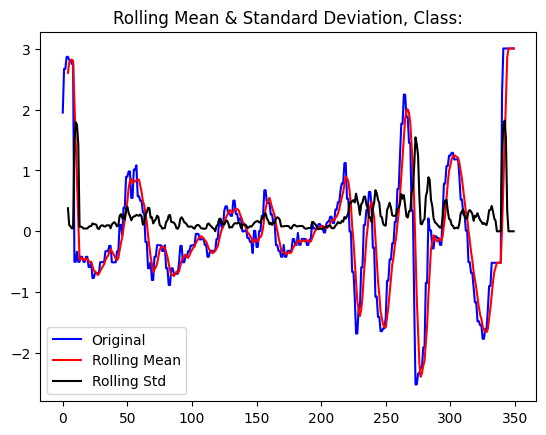

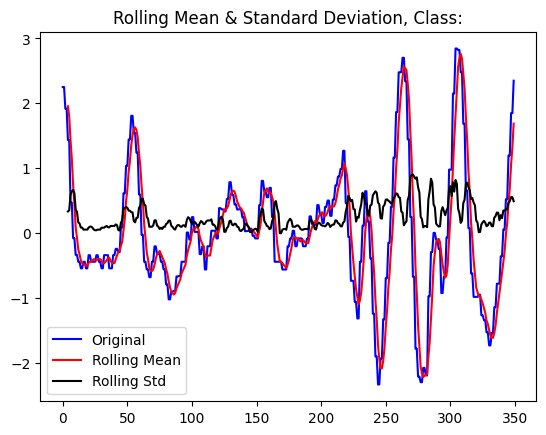

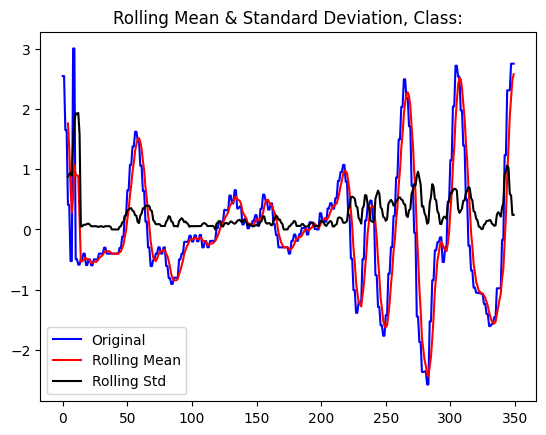

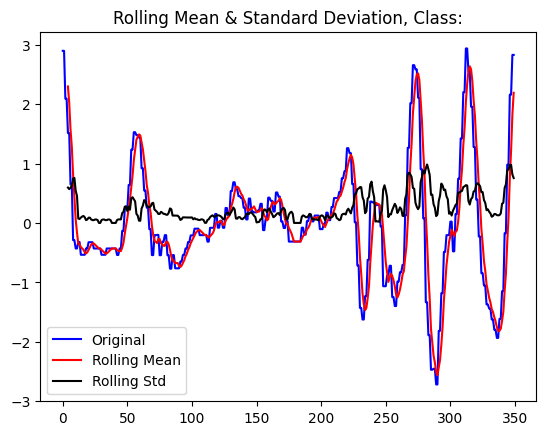

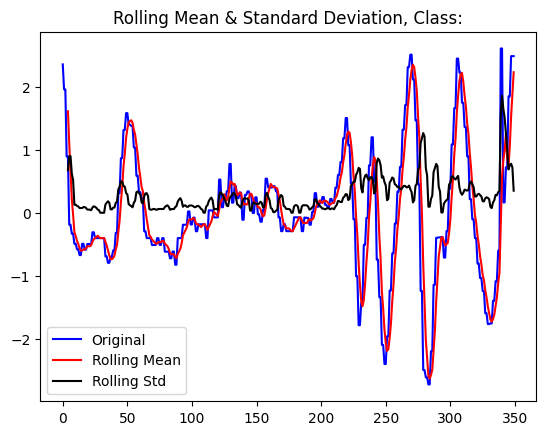

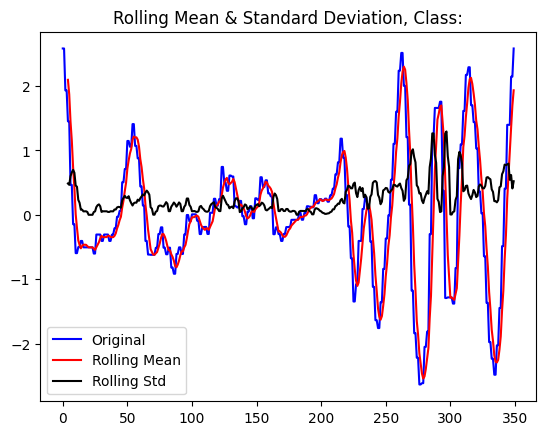

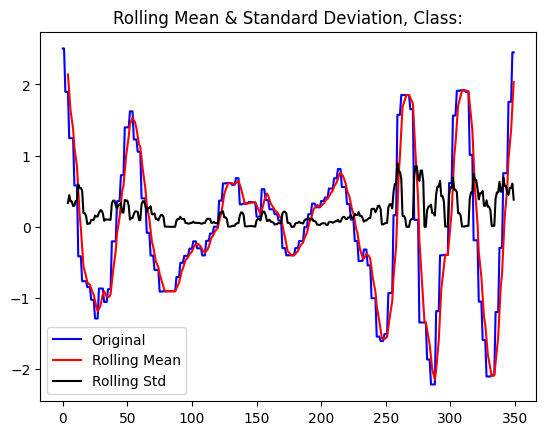

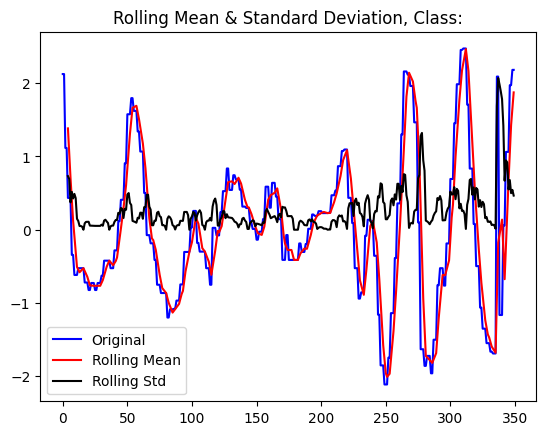

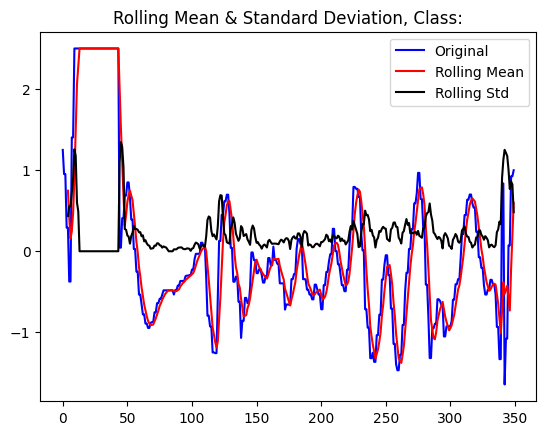

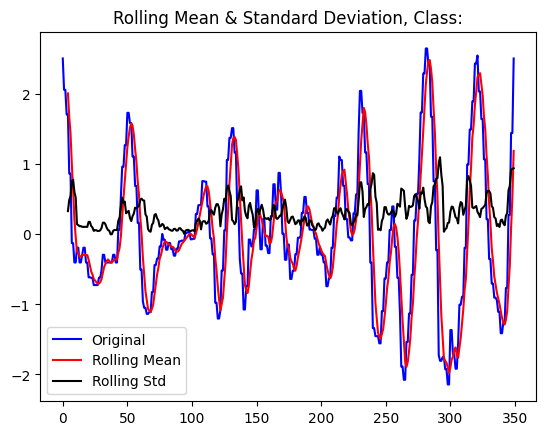

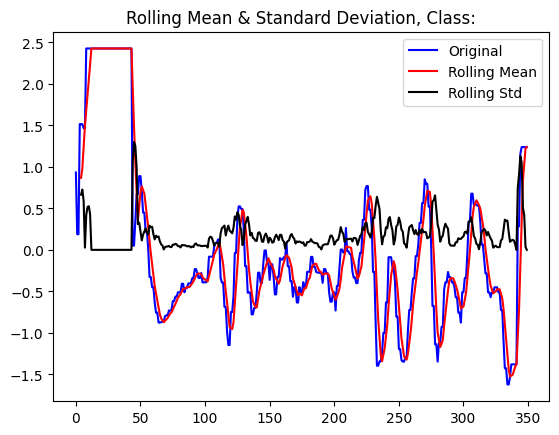

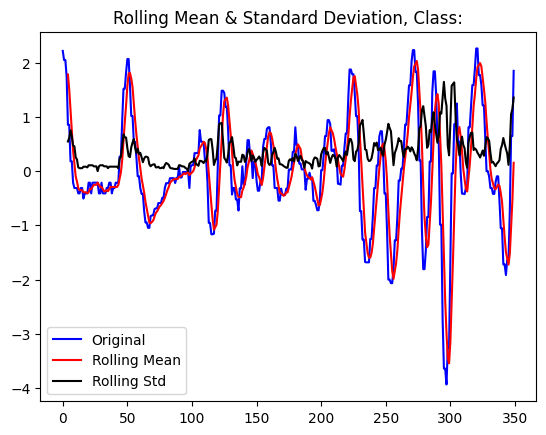

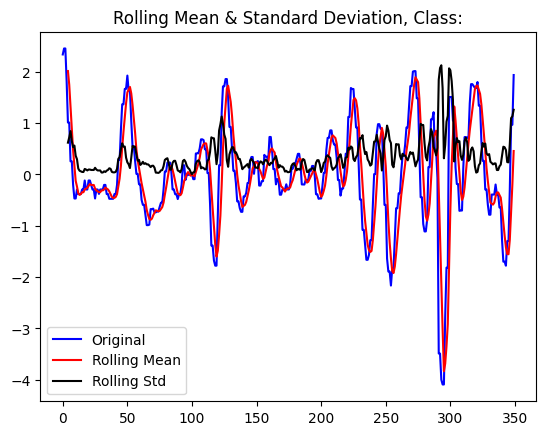

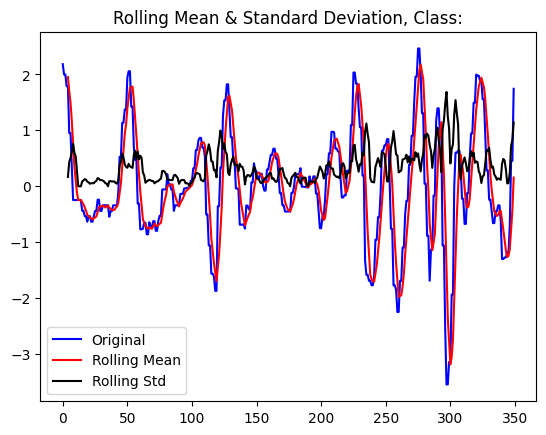

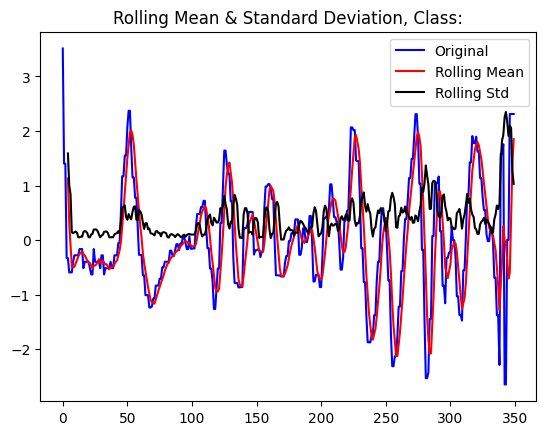

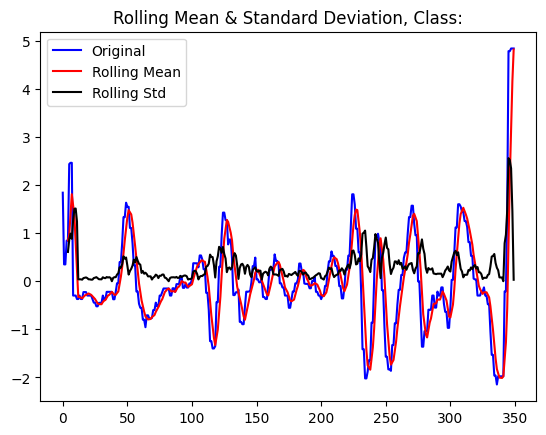

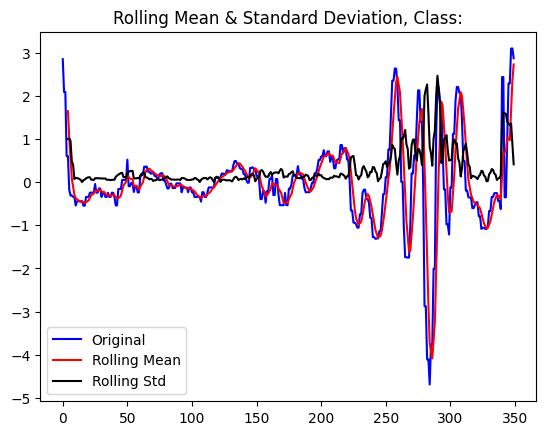

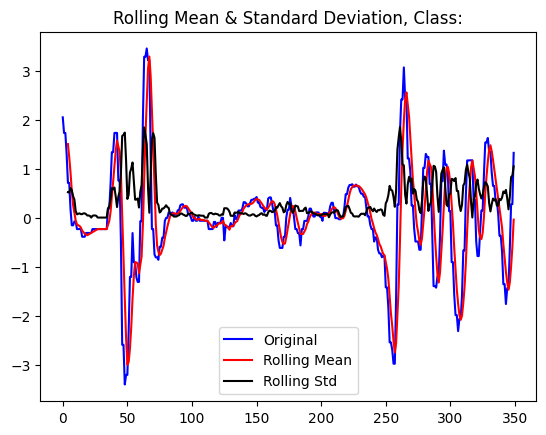

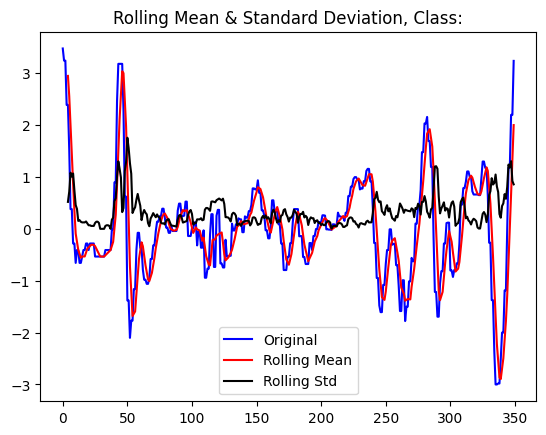

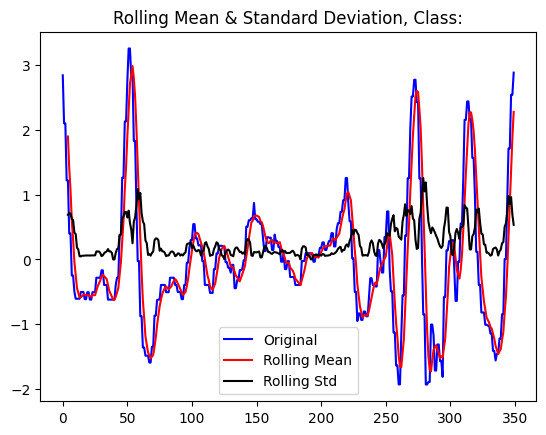

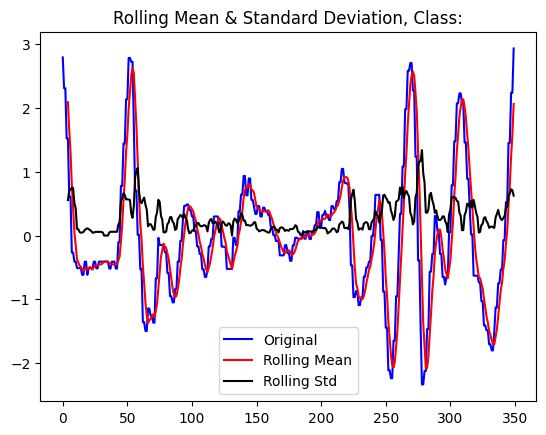

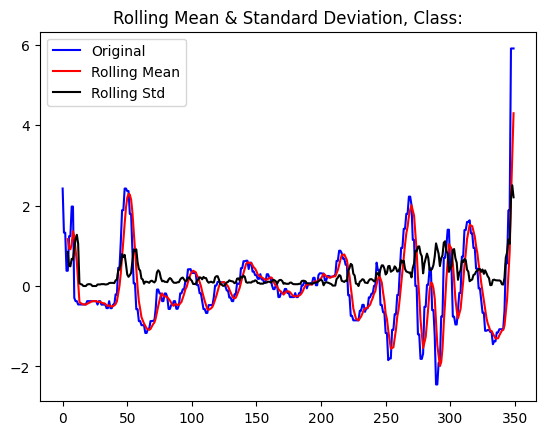

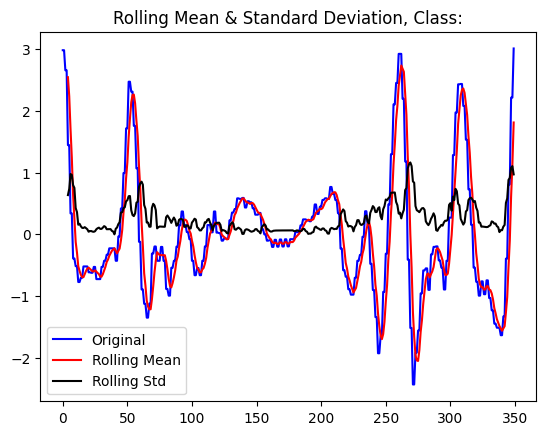

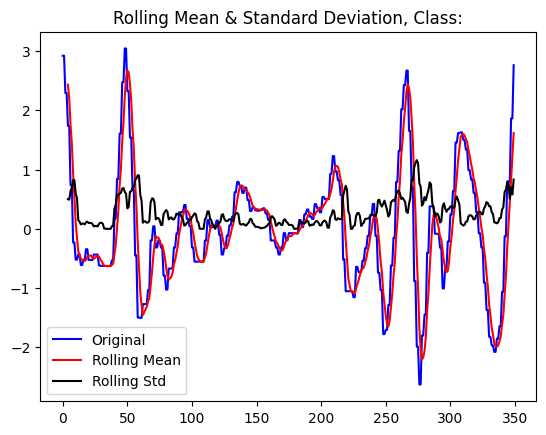

In [53]:

w = 5
for c in np.unique(y_train_lds):
    X_train_lds_c = X_train_lds[y_train_lds == c]
    
    for index, ts in enumerate(X_train_lds_c):
        # Assume 'ts' is your time series data in a pandas Series
        ts = pd.Series(ts)
        #ts.plot(title='Time Series Plot:'+ str(c) + ', i, '+ str(index) )
        plt.show()

        # Rolling statistics
        rolmean = ts.rolling(window=w).mean()
        rolstd = ts.rolling(window=w).std()

        plt.plot(ts, color='blue', label='Original')
        plt.plot(rolmean, color='red', label='Rolling Mean')
        plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation, Class:')
        plt.show()
        

    




In [54]:
acf_val, acf_confint = acf(X_train_lds_c[0], nlags=len(X_train_lds_c[0])-1,  alpha=.05)

In [55]:
acf_confint

array([[ 1.        ,  1.        ],
       [ 0.82052965,  1.03005861],
       [ 0.67125249,  1.01632948],
       [ 0.50028475,  0.92642282],
       [ 0.33647397,  0.81215789],
       [ 0.16948122,  0.67469069],
       [ 0.0040465 ,  0.52450745],
       [-0.14661672,  0.37970267],
       [-0.27968764,  0.24776348],
       [-0.39906536,  0.12840697],
       [-0.47852129,  0.05047314],
       [-0.55121375, -0.01843131],
       [-0.60605091, -0.06662512],
       [-0.64391725, -0.09536192],
       [-0.67524751, -0.11586391],
       [-0.68210612, -0.11057456],
       [-0.68991503, -0.10644164],
       [-0.68147796, -0.08619458],
       [-0.66415075, -0.05809911],
       [-0.64405682, -0.02863069],
       [-0.61177843,  0.01166557],
       [-0.58010623,  0.04964596],
       [-0.54761343,  0.08702397],
       [-0.51242017,  0.12587554],
       [-0.48452077,  0.15633904],
       [-0.45379649,  0.18890524],
       [-0.42474356,  0.21915532],
       [-0.41033491,  0.23428402],
       [-0.38732284,

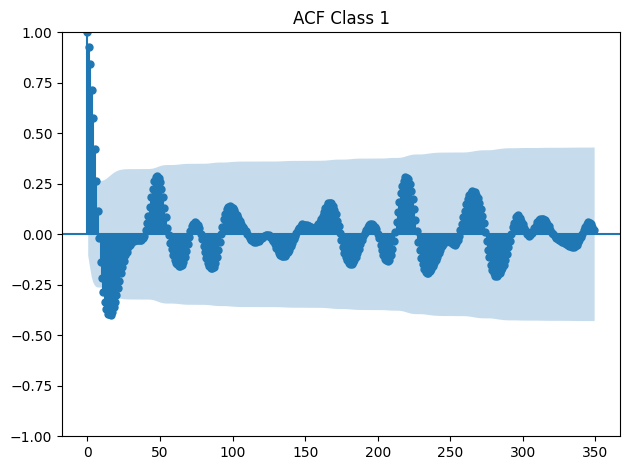

In [56]:
plot_acf(X_train_lds_c[0], lags=len(X_train_lds_c[0])-1,  alpha=.05, title='ACF Class 1')
plt.tight_layout()
plt.show()

In [57]:
pacf_val, pacf_confint = pacf(X_train_lds_c[0], method="ols", nlags=(len(X_train_lds_c[0])//2) - 1,  alpha=.05)

In [58]:
pacf_confint

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 8.43139808e-01,  1.05266877e+00],
       [-2.85212272e-01, -7.56833082e-02],
       [-6.22225833e-01, -4.12696869e-01],
       [-3.63983166e-01, -1.54454202e-01],
       [-8.97029497e-02,  1.19826014e-01],
       [-2.64029746e-01, -5.45007822e-02],
       [-1.57063611e-01,  5.24653522e-02],
       [ 5.38214874e-02,  2.63350451e-01],
       [-1.69729914e-01,  3.97990492e-02],
       [ 1.46978065e-01,  3.56507028e-01],
       [-2.58342885e-01, -4.88139214e-02],
       [-4.06196102e-01, -1.96667138e-01],
       [-1.45204396e-01,  6.43245677e-02],
       [-1.61511516e-01,  4.80174477e-02],
       [-5.66796553e-02,  1.52849308e-01],
       [-1.87234780e-01,  2.22941831e-02],
       [-1.95312959e-02,  1.89997668e-01],
       [-5.47842702e-02,  1.54744693e-01],
       [-1.11153660e-01,  9.83753032e-02],
       [-2.09114943e-01,  4.14020621e-04],
       [-2.97552680e-01, -8.80237169e-02],
       [-2.52844645e-01, -4.33156817e-02],
       [-1.

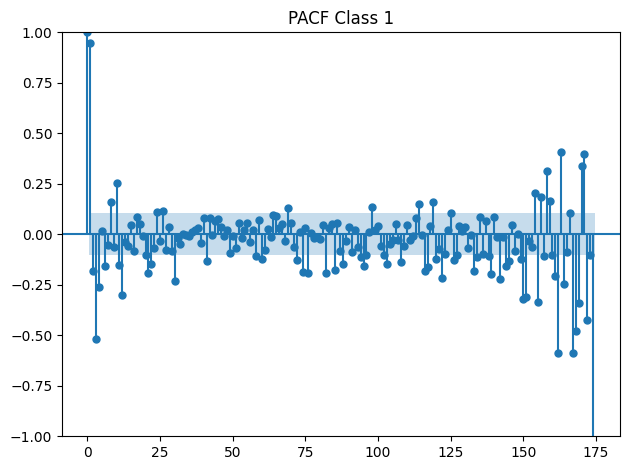

In [59]:
plot_pacf(X_train_lds_c[0], lags=len(X_train_lds_c[0])//2-1,  alpha=.05, title='PACF Class 1', method="ols")
plt.tight_layout()
plt.show()